### 분류(지도학습) - 특정 데이터로 유방암 진단하기

1. 데이터 수집 
- 사이킷런에서 제공하는 유방암 진단 데이터셋 사용

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
b_cancer = load_breast_cancer()
print(b_cancer.DESCR)  #데이터셋 설명 확인

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target  #'diagnosis'컬럼 종속변수로
b_cancer_df.head(15)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [4]:
print('유방암 진단 데이터셋 크기:', b_cancer_df.shape)
b_cancer_df.info()

유방암 진단 데이터셋 크기: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  

2. 로지스틱 회귀 분석에 사용될 데이터 정규화
- 평균 0, 분산 1이 되는 정규 분포 형태로 변형

In [5]:
#사이킷런 전처리 패키지에 있는 정규 분포 스케일러 import
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

print(b_cancer.data[0])
print()
print(b_cancer_scaled[0])  #정규 분포 스케일링 후 조정된 값 확인

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X,Y 설정하기
X = b_cancer_scaled
Y = b_cancer_df['diagnosis']

In [7]:
#train/test set 분할하기 > 7:3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

In [8]:
b_cancer_lr = LogisticRegression()  #모델 생성
b_cancer_lr.fit(X_train, Y_train)  #모델 훈련
Y_predict = b_cancer_lr.predict(X_test)  #예측 수행

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

confusion_matrix(Y_test, Y_predict)  #오차행렬

array([[ 60,   3],
       [  1, 107]])

In [10]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}\n정밀도: {1:.3f}\n재현율: {2:.3f}\nF1: {3:.3f}'.format(accuracy, precision, recall, f1))
print('ROC_AUC:{0:.3f}'.format(roc_auc))

정확도: 0.977
정밀도: 0.973
재현율: 0.991
F1: 0.982
ROC_AUC:0.972


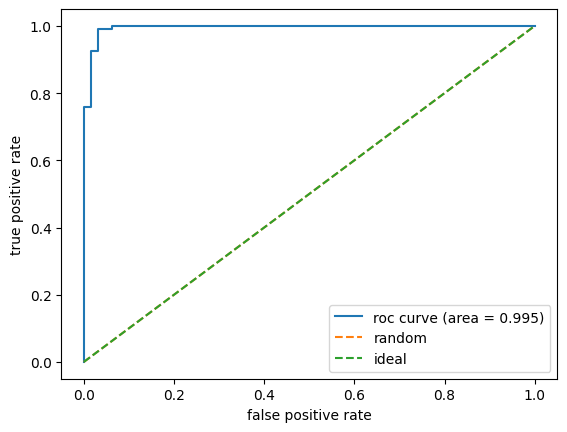

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = b_cancer_lr.predict_proba(X_test)[:, 1]  #검증 테스트가 클래스 1에 속하는지 확인하기
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)'% auc(fpr, tpr))
plt.plot([0,1], [0,1], linestyle='--', label='random')
plt.plot([0,0,1], [0,0,1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()